In [1]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

In [63]:
folder = '/home/utente/Documents/Optim/mpc-dock-default2/safe-mpc/data/2024-07-25_18-32-38PARTIAL_CONDENSING_HPIPM100800'
data = {}
for i in os.listdir(folder):
    if i[-4:]=='.pkl':
        with open(folder+'/'+i,'rb') as f:
            data[i[:-4]] = pickle.load(f)

In [3]:
data.keys()

dict_keys(['errors', 'safehor_hist', 'x_u', 'error_jump', 'jumps'])

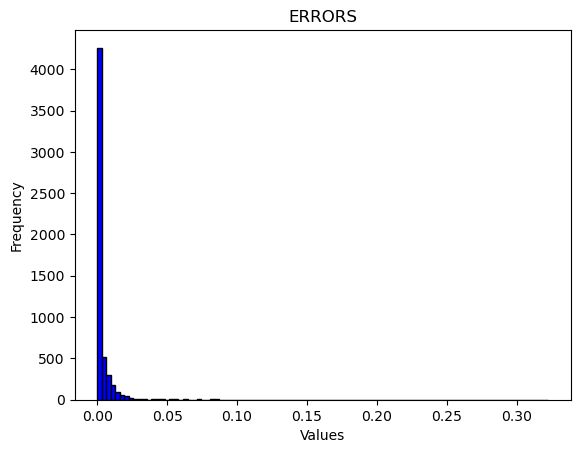

0.322353441284183

In [4]:
err = [item for sublist in data['errors'] for item in sublist]
err=np.array(err).flatten()
err=err[~np.isnan(err)]
err = err[err > 1e-4]

plt.hist(err, bins=100, color='blue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('ERRORS')
 
# Display the plot
plt.show()

np.max(err)

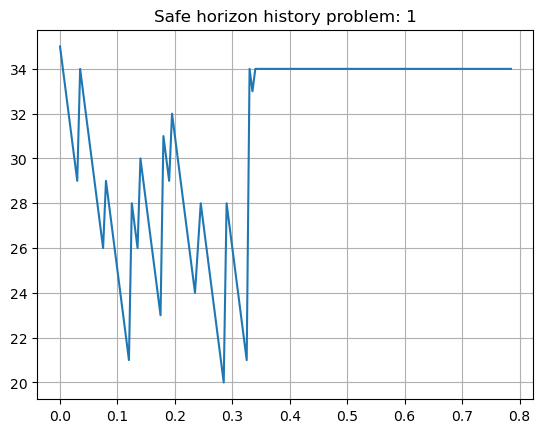

In [45]:
n=1
plotted=data['safehor_hist'][n]

plt.figure()
plt.title(f'Safe horizon history problem: {n}')
plt.grid(True)
plt.plot(np.arange(0,len(plotted))*5e-3,plotted)
plt.show()
plt.close()

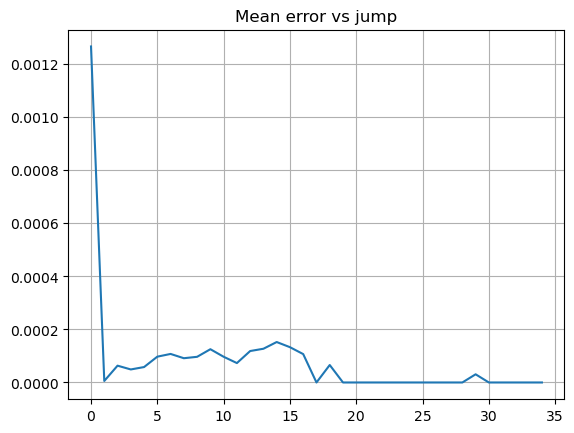

In [65]:
mean_error_jump = modified_list = [sublist if sublist else [0] for sublist in data['error_jump']]
for i in range(len(mean_error_jump)):
   a = np.array(mean_error_jump[i])
   a = a[~np.isnan(a)]
   mean_error_jump[i] = np.mean(a)


plt.figure()
plt.title('Mean error vs jump')
plt.grid(True)
plt.plot(mean_error_jump)
plt.show()
plt.close()

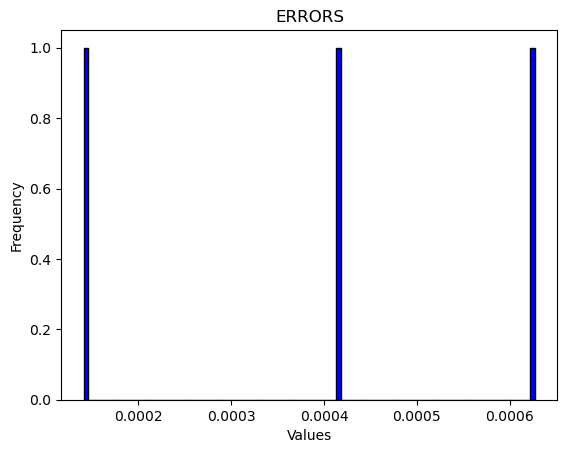

In [21]:
n_jump=18
err_jump=np.array(data['error_jump'][n_jump]).flatten()
err_jump=err_jump[~np.isnan(err_jump)]
err_jump = err_jump[err_jump > 1e-4]

plt.hist(err_jump, bins=100, color='blue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('ERRORS')
 
# Display the plot
plt.show()


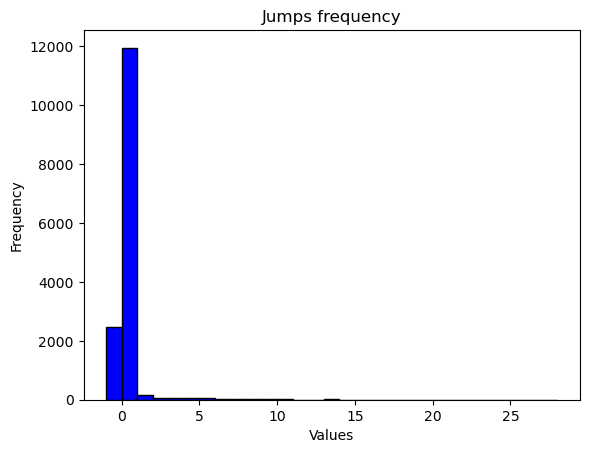

In [79]:
jumps = np.array(data['jumps']) 
#jumps=jumps[jumps<1]
plt.hist(jumps, bins=29, color='blue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Jumps frequency')
 
# Display the plot
plt.show()


In [80]:
len(jumps)

14934

In [91]:
xu = data['x_u']
x0=[]
x=xu['x_sim']
tot=0
for i in range(len(x)):
    tot+=len(x[i])
    x0.append(x[i][0][0])
tot

15034

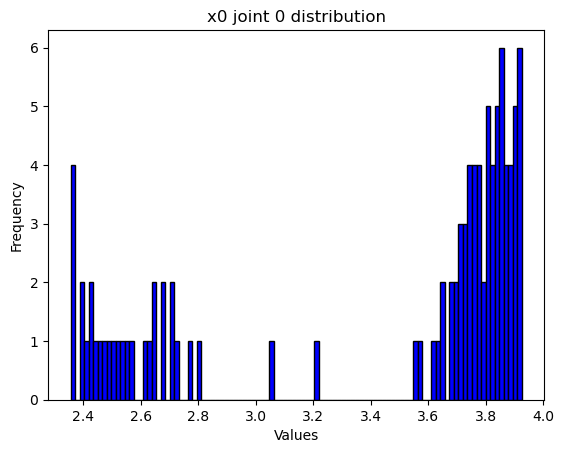

In [92]:
plt.hist(x0, bins=100, color='blue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('x0 joint 0 distribution')
 
# Display the plot
plt.show()

In [95]:
np.linspace(0,10,10+1)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])